*   Microproyecto 3
*   Equipo 4
* Arias Santiago
* Funez Camilo
* Mosquera Nicolas

##APRENDIZAJE SUPERVISADO:
##ÁRBOLES DE DECISIÓN – CLASIFICACIÓN BAYESIANA (Microproyecto 3)

# Información Del Data Set

La siguiente información se sustrajo del sitio original del data set, y cabe aclarar que el data set que se trabaja en este microproyecto está modificado con respecto al original.

Información de los atributos:

1. Identificación Individual (ID)

2. Motivo de la ausencia (CIE).
Las ausencias declaradas en el Código Internacional de Enfermedades (CIE) estratificadas en 21 categorías (1 a 21) de la siguiente manera:


> 1. Ciertas enfermedades infecciosas y parasitarias.
> 2. Neoplasias
> 3. Enfermedades de la sangre y de los órganos hematopoyéticos y ciertos trastornos que involucran el mecanismo inmunológico
> 4. Enfermedades endocrinas, nutricionales y metabólicas
> 5. Trastornos mentales y del comportamiento
> 6. Enfermedades del sistema nervioso
> 7. Enfermedades del ojo y anexos
> 8. Enfermedades del oído y apófisis mastoides
> 9. Enfermedades del sistema circulatorio
> 10. Enfermedades del sistema respiratorio
> 11. Enfermedades del sistema digestivo
> 12. Enfermedades de la piel y tejido subcutáneo
> 13. Enfermedades del sistema musculoesquelético y tejido conectivo
> 14. Enfermedades del sistema genitourinario
> 15. Embarazo, parto y puerperio
> 16. Determinadas condiciones originadas en el período perinata
> 17. Malformaciones congénitas, deformaciones y anomalías cromosómicas
> 18. Síntomas, signos y hallazgos clínicos y de laboratorio anormales, no clasificados en otra parte
> 19. Lesiones, intoxicaciones y algunas otras consecuencias de causas externas
> 20. Causas externas de morbilidad y mortalidad
> 21. Factores que influyen en el estado de salud y el contacto con los servicios de salud.

Y 7 categorías sin (CID) seguimiento de pacientes (22), consulta médica (23), donación de sangre (24), examen de laboratorio (25), ausencia injustificada (26), fisioterapia (27), consulta odontológica (28).
3. Mes de ausencia
4. Día de la semana (lunes (2), martes (3), miércoles (4), jueves (5), viernes (6))
5. Temporadas (verano (1), otoño (2), invierno (3), primavera (4))
6. Gastos de transporte
7. Distancia de la residencia al trabajo (kilómetros)
8. Tiempo de servicio
9. Edad
10. Carga de trabajo Promedio / día
11. Golpear objetivo
12. Fallo disciplinario (sí = 1; no = 0)
13. Educación (bachillerato (1), posgrado (2), posgrado (3), maestría y doctorado (4))
14. Hijo (número de hijos)
15. Bebedor social (sí = 1; no = 0)
16. Fumador social (sí = 1; no = 0)
17. Mascota (número de mascota)
18. Peso
19. Altura
20. Índice de masa corporal
21. Tiempo de absentismo en horas

# Acceso a Google Drive

In [ ]:
#Se importa el almacenamiento Google Drive, ésto puede ser visible desde el menú de la izquierda
from google.colab import drive
drive.mount("/content/drive/")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
import random

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# librerías Árboles de Decisión
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

# librerías Gaussian Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import make_scorer


# Lectura y Preprocesamiento de los Datos



In [ ]:
data=pd.read_excel("/content/drive/MyDrive/Inteligencia Artificial (IA)/Microproyecto3/Absenteeism_at_work.xls")
data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,93,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,95,0,1,2,1,0,2,100,170,35,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

Según la información suministrada anteriormente, se observa que el dataset está compuesto por 740 filas (enumeradas desde 0 a 739) y 21 columnas (características o features), dichas variables se observan en el código de la celda anterior. La variable objetivo a predecir es llamada "Absenteeism time in hours".

No hay datos nulos y todos los datos son de tipo entero.

In [ ]:
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               706 non-null    int64
 1   Reason for absence               706 non-null    int64
 2   Month of absence                 706 non-null    int64
 3   Day of the week                  706 non-null    int64
 4   Seasons                          706 non-null    int64
 5   Transportation expense           706 non-null    int64
 6   Distance from Residence to Work  706 non-null    int64
 7   Service time                     706 non-null    int64
 8   Age                              706 non-null    int64
 9   Work load Average/day            706 non-null    int64
 10  Hit target                       706 non-null    int64
 11  Disciplinary failure             706 non-null    int64
 12  Education                        706 non-null    i

La celda anterior elimina las filas repetidas(si existen), en total se eliminaron 33 filas que estaban repetidas.

Se observa también que hay características de tipo booleano y de tipo categórico, así que se procede a realizar éste cambio. Pero antes, se verifica que dichas características no tengan errores en sus entradas.

In [ ]:
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,18.192635,18.882436,6.410765,3.890935,2.549575,222.977337,29.297450,12.495751,36.478754,272089.984419,94.548159,0.056657,1.291785,1.060907,0.565156,0.076487,0.769122,79.005666,172.202550,26.635977,7.143059
std,10.927472,8.482877,3.404811,1.425503,1.121527,67.293426,14.706661,4.370190,6.563404,39458.780251,3.803854,0.231350,0.671499,1.104717,0.496088,0.265965,1.333351,12.862501,6.159814,4.254901,13.608120
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,10.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,92.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264604.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,80.000000,171.000000,25.000000,3.000000
75%,28.000000,26.000000,9.750000,5.000000,4.000000,260.000000,49.000000,16.000000,40.000000,294217.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Se observa que en la columna Month of absence existen entradas con cero(0), lo que demuestra la existencia de entradas corruptas al no existir el mes cero. Dichas filas se borrarán.

También se observa que existe una categoría no específicada inicialmente en motivo de absentismo(reason for absence), dicha categoría se denota como cero (0). Esta categoría se seguirá trabajando y se considerará como "otros motivos". Se observa también que Social drinker, Social smoker y Disciplinary failure presentan valores mínimos y máximos de 0 y 1, lo que es correcto para un tipo booleano. Y las características categóricas también estan bien definidas (excepto por Month of absence).

In [ ]:
data=data[data['Month of absence'] != 0]
data['Social drinker'] = data['Social drinker'].astype('category')#
data['Social smoker'] = data['Social smoker'].astype('category')#
data['Disciplinary failure'] = data['Disciplinary failure'].astype('category')#
data['Seasons'] = data['Seasons'].astype('category')
data['Education'] = data['Education'].astype('category')
data['Day of the week'] = data['Day of the week'].astype('category')
data['Month of absence'] = data['Month of absence'].astype('category')
data['Reason for absence'] = data['Reason for absence'].astype('category')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 0 to 736
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               703 non-null    int64   
 1   Reason for absence               703 non-null    category
 2   Month of absence                 703 non-null    category
 3   Day of the week                  703 non-null    category
 4   Seasons                          703 non-null    category
 5   Transportation expense           703 non-null    int64   
 6   Distance from Residence to Work  703 non-null    int64   
 7   Service time                     703 non-null    int64   
 8   Age                              703 non-null    int64   
 9   Work load Average/day            703 non-null    int64   
 10  Hit target                       703 non-null    int64   
 11  Disciplinary failure             703 non-null    category
 12  Educatio

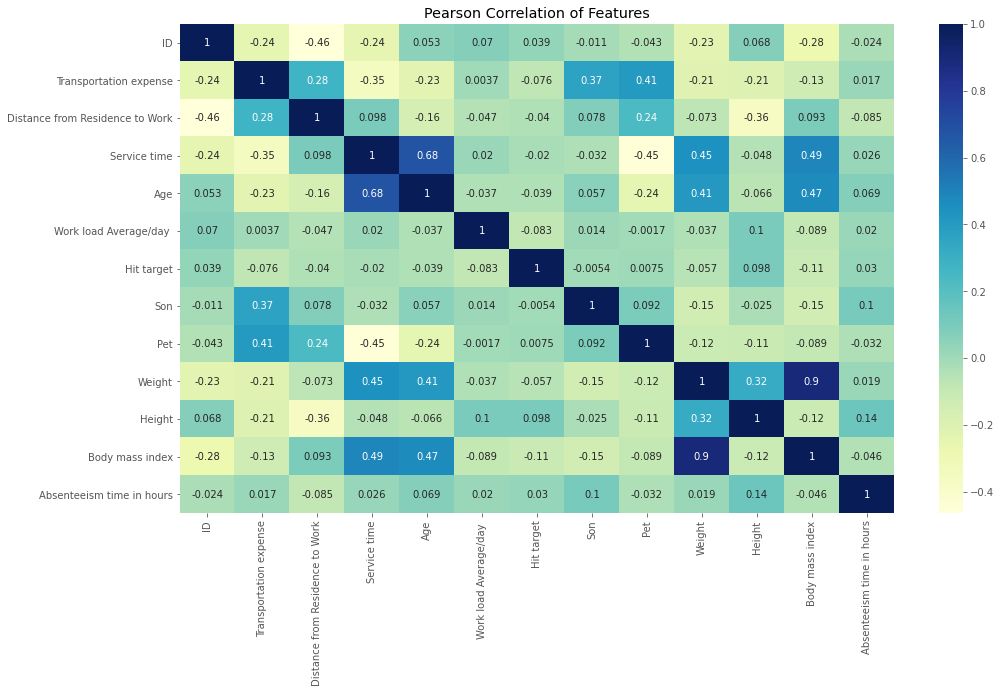

In [ ]:
plt.title('Pearson Correlation of Features')
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

El mapa de calor de correlación entre las variables muestra que el peso y el índice de masa corporal tienen una correlación bastante alta, lo cual es lo esperado debido a que el IMC es peso/(estatura)^2. Pero dado que la correlación de Pearson también muestra poca correlación entre el IMC y la estatura, se eliminará el IMC.

Las demás variables muestran poca correlación entre sí, por eso no se eliminarán.

In [ ]:
data=data.drop(['Body mass index'], axis=1)

Por último, se transformará la variable objetivo para llegar a un problema de clasificación, teniendo en cuenta el promedio; es decir, si las horas de absentismo son menores o iguales a 7 se clasificará como poco ausente(0), y si es mayor, será muy ausente (1).

In [ ]:
data['Absenteeism time in hours']=np.where((data['Absenteeism time in hours']<=7),0,data['Absenteeism time in hours'])
data['Absenteeism time in hours']=np.where(data['Absenteeism time in hours']>7,1,data['Absenteeism time in hours'])


Ahora, se extraen 10 filas de los datos para usarlos en predicción.

In [ ]:
datapred=data.sample(10,random_state=1)

In [ ]:
datapred

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours
418,3,28,4,4,3,179,51,18,38,239409,98,0,1,0,1,0,0,89,170,1
438,34,28,5,2,3,118,10,10,37,246074,99,0,1,0,0,0,0,83,172,0
341,3,28,12,2,4,179,51,18,38,236629,93,0,1,0,1,0,0,89,170,0
198,11,19,4,3,3,289,36,13,33,326452,96,0,1,2,1,0,1,90,172,1
194,24,14,4,6,3,246,25,16,41,326452,96,0,1,0,1,0,0,67,170,1
383,15,23,2,3,2,291,31,12,40,251818,96,0,1,1,1,0,1,73,171,0
725,5,26,7,4,1,235,20,13,43,264604,93,0,1,1,1,0,0,106,167,0
630,3,13,3,3,2,179,51,18,38,222196,99,0,1,0,1,0,0,89,170,1
371,28,7,2,4,2,225,26,9,28,251818,96,0,1,1,0,0,2,69,169,0
393,20,28,3,6,2,260,50,11,36,244387,98,0,1,4,1,0,0,65,168,0


Por lo que los valores a predecir son: [1 0 0 1 1 0 0 1 0 0]

Se remueven los datos de predicción en los datos originales y se reinicia el índice

In [ ]:
indexRemove=datapred.index
data=data.drop(indexRemove)
data=data.reset_index(drop=True)
data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,0
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,0
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,0
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,0
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,10,22,7,4,1,361,52,3,28,264604,93,0,1,1,1,0,4,80,172,1
689,28,22,7,4,1,225,26,9,28,264604,93,0,1,1,0,0,2,69,169,1
690,13,13,7,2,1,369,17,12,31,264604,93,0,1,3,1,0,0,70,169,1
691,11,14,7,3,1,289,36,13,33,264604,93,0,1,2,1,0,1,90,172,1


In [ ]:
data['Absenteeism time in hours'].value_counts()

0    427
1    266
Name: Absenteeism time in hours, dtype: int64

La celda anterior evidencia un desbalance en los datos. Para calcular el peso de cada clase, se puede establecer el peso de la clase más grande en 1 y establecer el peso de la clase más pequeña en la relación entre el número de muestras de la clase más grande y el número de muestras de la clase más pequeña.

In [ ]:
minhojas=range(1,500,5)
minsplit=range(2,500,1)

# Árbol de Decisión con Cross Validation (Kfolds)

Profundidad del árbol según número de atributos (variables) y se aplica la métrica índice gini.

In [ ]:
cv = KFold(n_splits=15,random_state=1, shuffle=True) # n_splits=Numero deseado de "folds" que haremos (5 como default)
accuracies = list()

max_attributes = len(list(data))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='gini',
                                             #min_samples_split=,
                                             #min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={0:1, 1:427/266}#Pesos para balancear
                                             ) # Por defecto todas las clases igual peso

    for train_fold, valid_fold in cv.split(data):
        f_train = data.loc[train_fold]
        f_valid = data.loc[valid_fold]

        model = tree_model.fit(X = f_train.drop(['Absenteeism time in hours'], axis=1),
                               y = f_train["Absenteeism time in hours"])
        valid_acc = model.score(X = f_valid.drop(['Absenteeism time in hours'], axis=1),
                                y = f_valid["Absenteeism time in hours"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)

# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.750108
         2          0.810762
         3          0.818039
         4          0.816559
         5          0.813599
         6          0.810731
         7          0.809343
         8          0.799229
         9          0.813814
        10          0.793617
        11          0.790749
        12          0.779186
        13          0.780728
        14          0.774931
        15          0.790842
        16          0.783595
        17          0.782146
        18          0.785045
        19          0.785045
        20          0.779217


Profundidad del árbol ésta vez usando el criterio de entropia

In [ ]:
cv = KFold(n_splits=15,random_state=1, shuffle=True) # n_splits=Numero deseado de "folds" que haremos (5 como default)
accuracies = list()

max_attributes = len(list(data))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             #min_samples_split=20,
                                             #min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={0:1, 1:427/266}#Pesos para balancear
                                             ) # Por defecto todas las clases igual peso

    for train_fold, valid_fold in cv.split(data):
        f_train = data.loc[train_fold]
        f_valid = data.loc[valid_fold]

        model = tree_model.fit(X = f_train.drop(['Absenteeism time in hours'], axis=1),
                               y = f_train["Absenteeism time in hours"])
        valid_acc = model.score(X = f_valid.drop(['Absenteeism time in hours'], axis=1),
                                y = f_valid["Absenteeism time in hours"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)

# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.750108
         2          0.807863
         3          0.823836
         4          0.825224
         5          0.828122
         6          0.805150
         7          0.793555
         8          0.783595
         9          0.792384
        10          0.770768
        11          0.776565
        12          0.773697
        13          0.767962
        14          0.780913
        15          0.772371
        16          0.775177
        17          0.770984
        18          0.772402
        19          0.772340
        20          0.769504


Evaluando la cantidad de muestras por hoja bajo criterio de entropia

In [ ]:
cv = KFold(n_splits=15,random_state=1, shuffle=True) # n_splits=Numero deseado de "folds" que haremos (5 como default)
accuracies = list()

# Testearemos el min samples leaf
for m in minhojas:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             #min_samples_split=20,
                                             min_samples_leaf=m,
                                             #max_depth = depth,
                                             class_weight={0:1, 1:427/266}#Pesos para balancear
                                             ) # Por defecto todas las clases igual peso

    for train_fold, valid_fold in cv.split(data):
        f_train = data.loc[train_fold]
        f_valid = data.loc[valid_fold]

        model = tree_model.fit(X = f_train.drop(['Absenteeism time in hours'], axis=1),
                               y = f_train["Absenteeism time in hours"])
        valid_acc = model.score(X = f_valid.drop(['Absenteeism time in hours'], axis=1),
                                y = f_valid["Absenteeism time in hours"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)

# Mostramos los resultados obtenidos
df = pd.DataFrame({"min_samples_leaf": minhojas, "Average Accuracy": accuracies})
df = df[["min_samples_leaf", "Average Accuracy"]]
print(df.to_string(index=False))

 min_samples_leaf  Average Accuracy
                1          0.773790
                6          0.771970
               11          0.796608
               16          0.816744
               21          0.829633
               26          0.823959
               31          0.823928
               36          0.803577
               41          0.789146
               46          0.783472
               51          0.784921
               56          0.780574
               61          0.751650
               66          0.754456
               71          0.747209
               76          0.747209
               81          0.750108
               86          0.750108
               91          0.750108
               96          0.750108
              101          0.750108
              106          0.750108
              111          0.750108
              116          0.750108
              121          0.750108
              126          0.750108
              131          0

Evalución de la cantidad de muestras mínimas para dividir un nodo bajo criterio de entropia

In [ ]:
cv = KFold(n_splits=15,random_state=1, shuffle=True) # n_splits=Numero deseado de "folds" que haremos (5 como default)
accuracies = list()

# Testearemos la profundidad de 1 a cantidad de atributos +1
for m in minsplit:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=m,
                                             #min_samples_leaf=m,
                                             #max_depth = depth,
                                             class_weight={0:1, 1:427/266}#Pesos para balancear
                                             ) # Por defecto todas las clases igual peso

    for train_fold, valid_fold in cv.split(data):
        f_train = data.loc[train_fold]
        f_valid = data.loc[valid_fold]

        model = tree_model.fit(X = f_train.drop(['Absenteeism time in hours'], axis=1),
                               y = f_train["Absenteeism time in hours"])
        valid_acc = model.score(X = f_valid.drop(['Absenteeism time in hours'], axis=1),
                                y = f_valid["Absenteeism time in hours"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)

# Mostramos los resultados obtenidos
df = pd.DataFrame({"min_samples_split": minsplit, "Average Accuracy": accuracies})
df = df[["min_samples_split", "Average Accuracy"]]
print(df.to_string(index=False))

 min_samples_split  Average Accuracy
                 2          0.765187
                 3          0.762195
                 4          0.770891
                 5          0.775177
                 6          0.775146
                 7          0.777953
                 8          0.776472
                 9          0.770675
                10          0.773512
                11          0.772032
                12          0.772032
                13          0.773481
                14          0.773512
                15          0.776411
                16          0.792322
                17          0.790811
                18          0.787912
                19          0.786401
                20          0.786401
                21          0.782115
                22          0.784952
                23          0.786432
                24          0.787882
                25          0.783565
                26          0.783565
                27          0.785014
 

Se observa que el nivel del árbol en donde la exactitud es máxima es en 5 usando el criterio de entropia, donde la cantidad mínima de muestras por hoja es 21 y donde la cantidad mínima de muestras para dividir un nodo es de 125. Pero la exactitud más alta se obtiene en cantidad mínima de muestras de 21.    Se crea el árbol teniendo en cuenta lo anterior

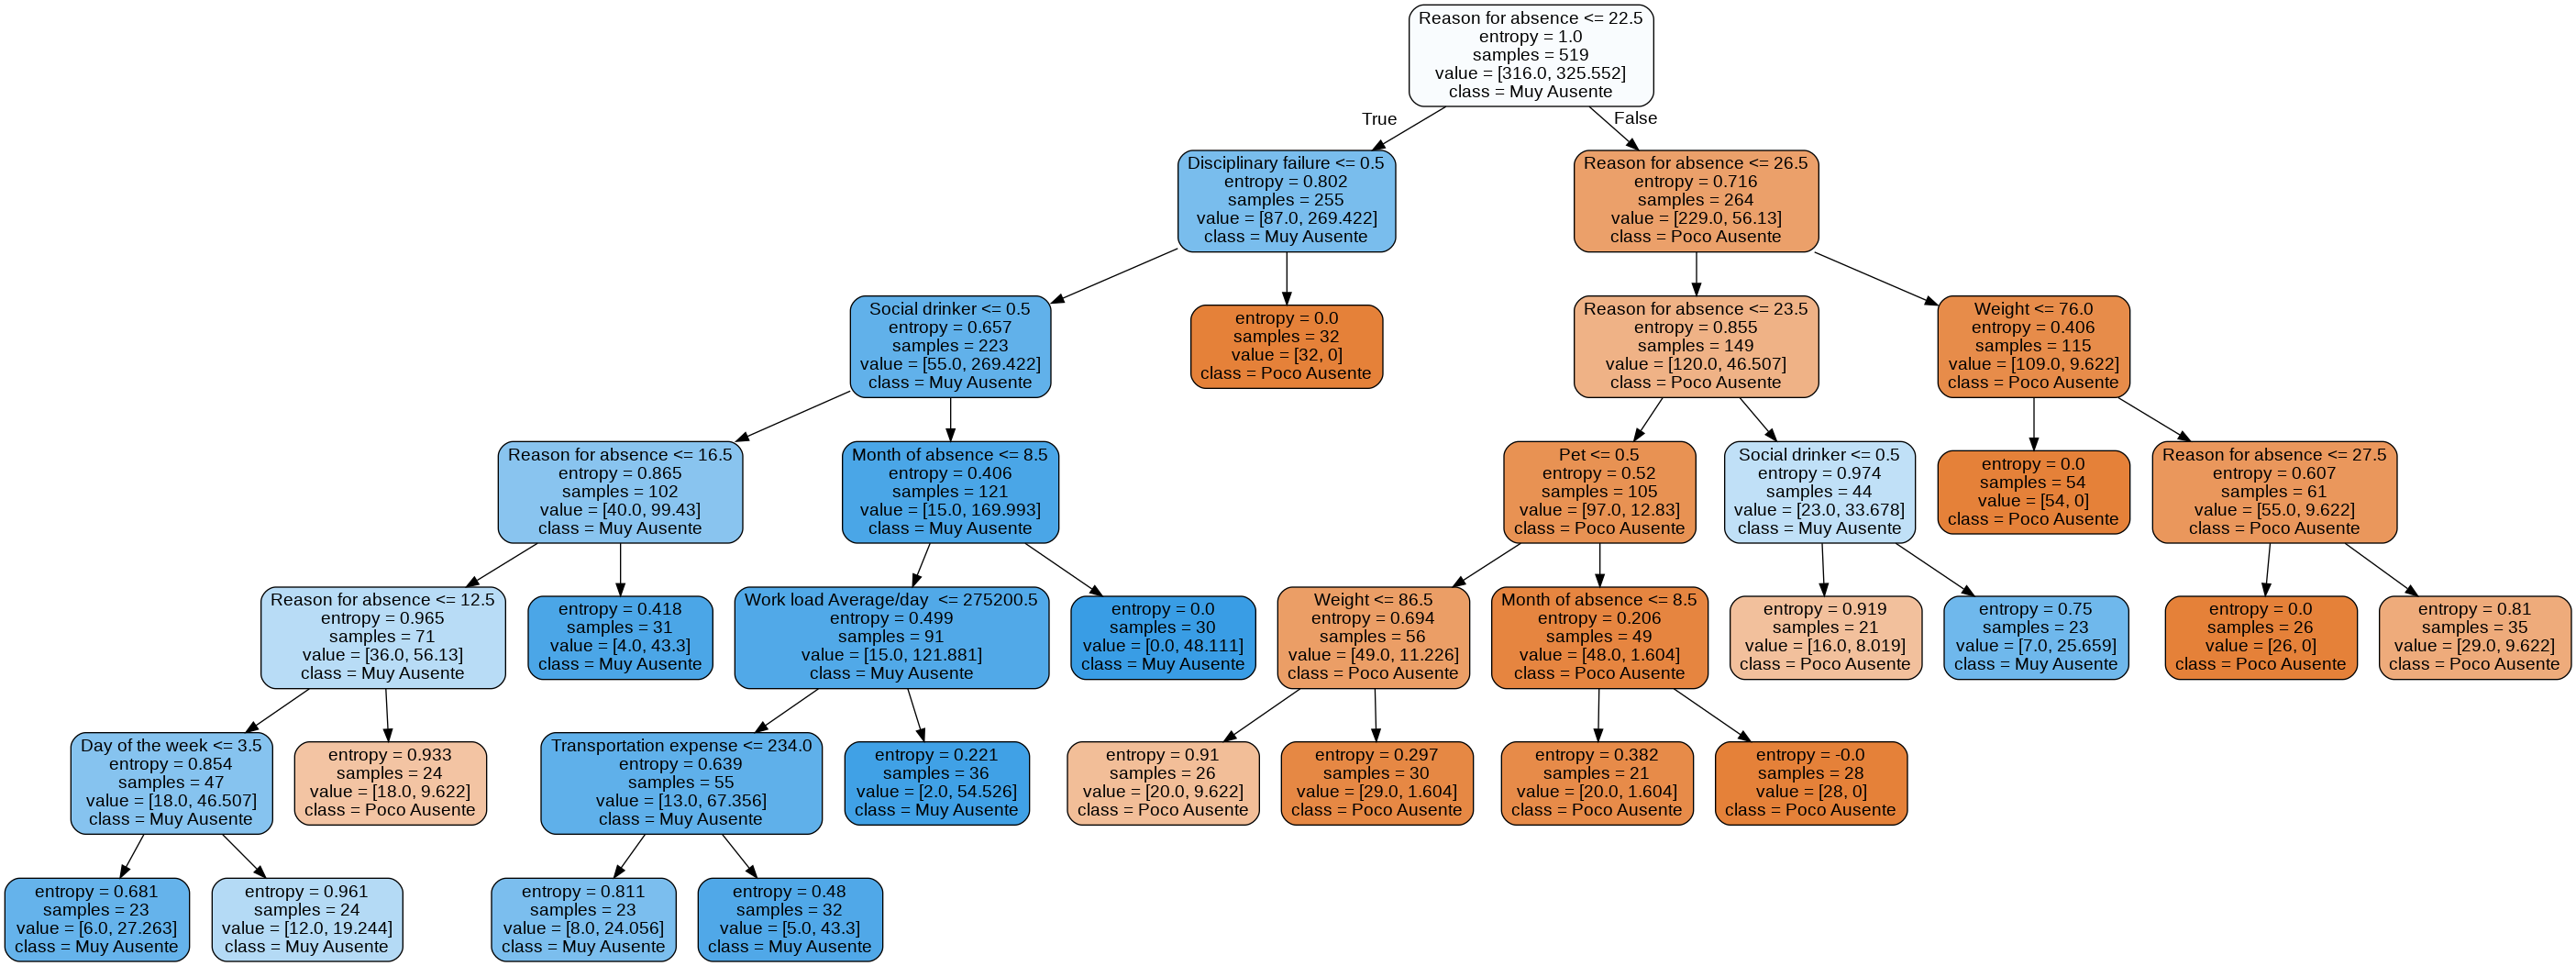

In [ ]:
# Crear arrays de entrenamiento
x_train, x_test, y_train, y_test = train_test_split(data.drop(['Absenteeism time in hours'], axis=1).values, data['Absenteeism time in hours'], random_state=0)
# Crear Arbol de decision con profundidad = 3
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            #min_samples_split=20,
                                            min_samples_leaf=21,
                                            #max_depth = 5,
                                            class_weight={0:1, 1:433/270}
                                            )

decision_tree.fit(x_train, y_train)

# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(data.drop(['Absenteeism time in hours'], axis=1)),
                              class_names = ['Poco Ausente', 'Muy Ausente'],
                              rounded = True,
                              filled= True )

# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

El nodo raíz es quien tiene mayor incidencia en la variable objetivo, y, en este caso, con un índice de entropia de 1, la característica más incidente es el motivo de ausencia (Reason for absence).

# Importancia De Las Características

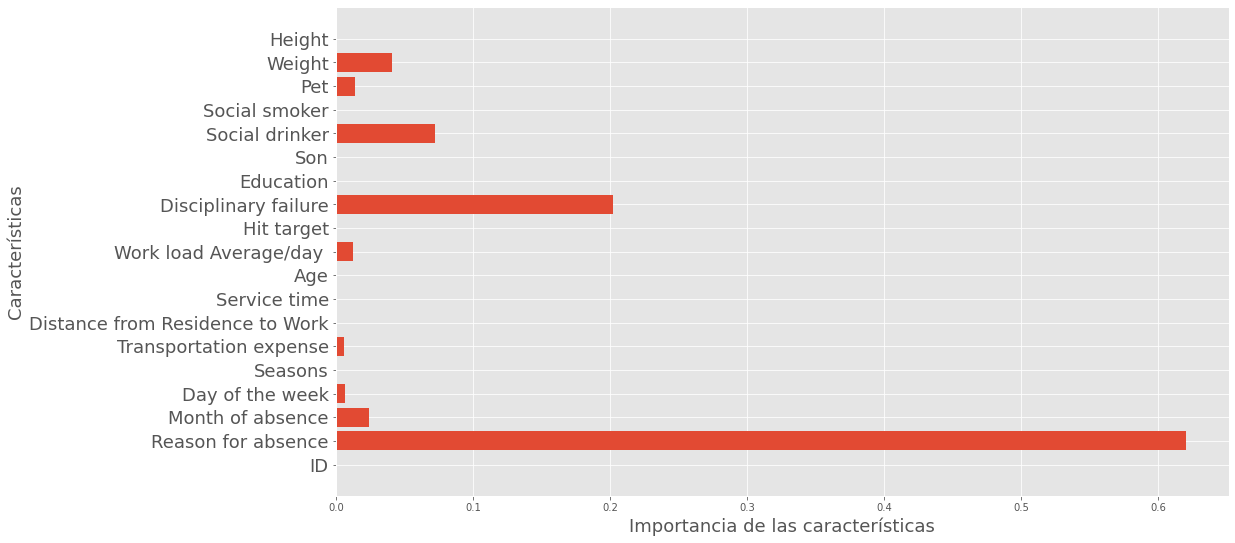

In [ ]:
#Se evalua la importancia de las caractrísticas (variables)
#con la función feature_importance_ de la librería sklearn
caract=19

plt.barh(range(caract), decision_tree.feature_importances_)
plt.yticks(np.arange(caract),data.columns.drop(['Absenteeism time in hours']), size=18)
plt.xlabel('Importancia de las características', size=18)
plt.ylabel('Características', size=18)

plt.show()

Según lo anterior, las características más importantes en el árbol son, ordenadas de mayor a menor importancia: Reason for absence, Disciplinary failure, Social drinker, Weight, Month of Absence, pet, Work Load Average, Transportatin expense y Day of the week.

#Datos Usados Para Entrenamiento y Para Prueba

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


519
174
519
174


Se usaron 519 datos para el entrenamiento (75%) y 174 para prueba (25%).

# Precisión Del Árbol

Entrenamiento

In [ ]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree,'%')

86.71 %


Validación

In [ ]:
acc_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
print(acc_decision_tree,'%')

81.03 %


# Predicción del Árbol de Decisión

In [ ]:
y_pred = decision_tree.predict(datapred.drop(['Absenteeism time in hours'], axis = 1))
print("Prediccion: " + str(y_pred))
y_proba = decision_tree.predict_proba(datapred.drop(['Absenteeism time in hours'], axis = 1))
print("Probabilidad de Acierto: " + str(np.round(y_proba[0][y_pred]* 100, 2)) + "%")

Prediccion: [0 0 0 1 1 0 1 1 1 0]
Probabilidad de Acierto: [75.09 75.09 75.09 24.91 24.91 75.09 24.91 24.91 24.91 75.09]%


#Matrices De Confusión Del Árbol De Decisión

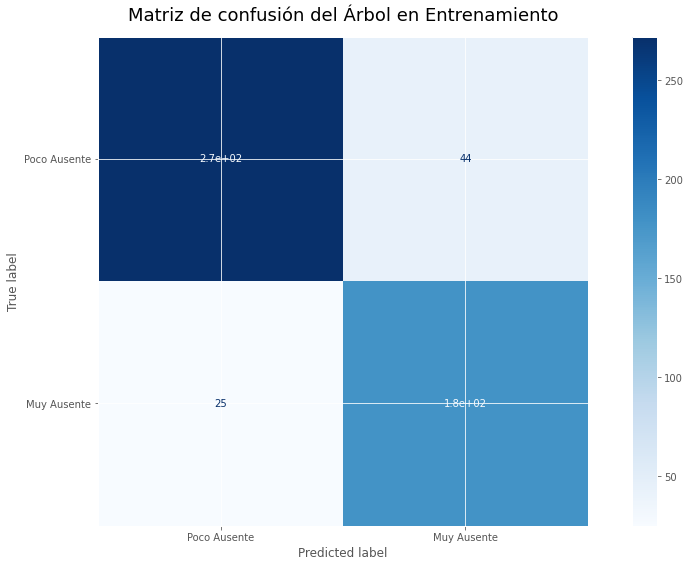

In [ ]:
disp = plot_confusion_matrix(decision_tree, x_train, y_train,
                                 display_labels=['Poco Ausente', 'Muy Ausente'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol en Entrenamiento', y=1.02, size=18)

plt.show()

cantidad de predicciones positivas que fueron correctas: Exactitud= (260+190)/515 =0.8654


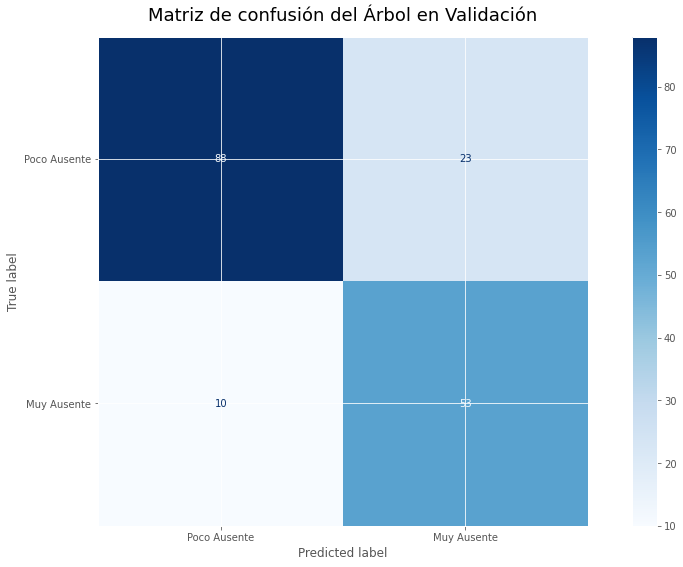

In [ ]:
disp = plot_confusion_matrix(decision_tree, x_test, y_test,
                                 display_labels=['Poco Ausente', 'Muy Ausente'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol en Validación', y=1.02, size=18)

plt.show()

Exactitud= (84+55)/174 =0.7989

# Clasificador Bayesiano GNB (Gaussian Naive Bayes)

Para aplicar este clasificador hay que tomar en cuenta los siguientes supuestos:

>1.   Los datos distribuyen normal
2.   Los datos no estan correlacinados

Previamente se analizó la correlación de Pearson de los datos y como resultado se obtuvo que los datos poseian cierto grado de correlación. A continuación se analisará la distribución de los datos.



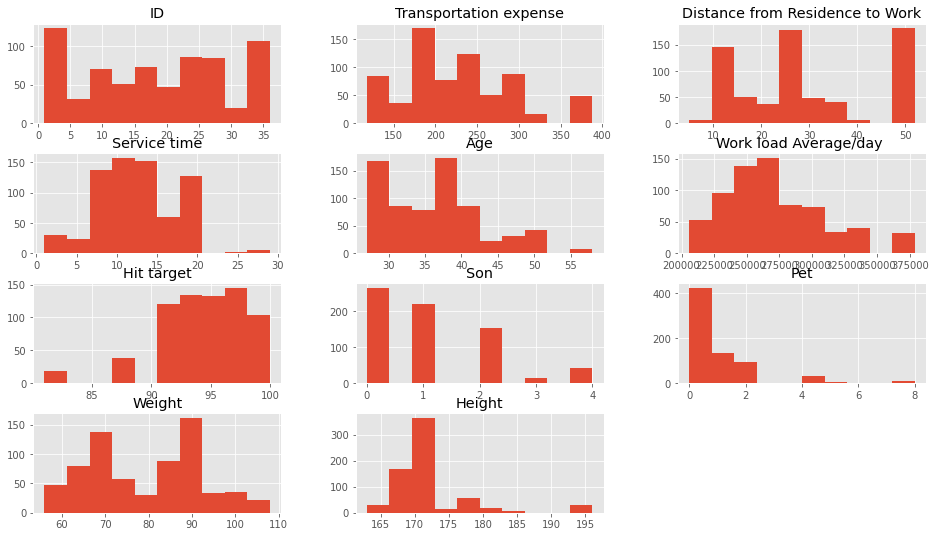

In [ ]:
data.drop(['Absenteeism time in hours'], axis=1).hist()
plt.show()

Se observa que ninguna de las características distribuye normalmente.

Se procede al entrenamiento GNB, ya que una de las bondades de éste método, es que es posible aplicarlo a pesar de que los supuestos no se cumplan.

In [ ]:
# Crear arrays de entrenamiento
x_train, x_test, y_train, y_test = train_test_split(data.drop(['Absenteeism time in hours'], axis=1).values, data['Absenteeism time in hours'], random_state=0)


# Precisión del GNB

Entrenamiento

In [ ]:
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

print('Accuracy in training set: {:.2f}'
     .format(gnb.score(x_train, y_train)))
print('Accuracy in test set: {:.2f}'
     .format(gnb.score(x_test, y_test)))

Accuracy in training set: 0.71
Accuracy in test set: 0.67


# Predicción del GNB

In [ ]:
y_pred=gnb.predict(datapred.drop(['Absenteeism time in hours'], axis=1))
print("Prediccion: " + str(y_pred))
y_proba = gnb.predict_proba(datapred.drop(['Absenteeism time in hours'], axis = 1))
print("Probabilidad de Acierto: " + str(np.round(y_proba[0][y_pred]* 100, 2)) + "%")


Prediccion: [0 0 0 1 0 0 0 0 0 0]
Probabilidad de Acierto: [83.12 83.12 83.12 16.88 83.12 83.12 83.12 83.12 83.12 83.12]%


#Matrices De Confusión GNB

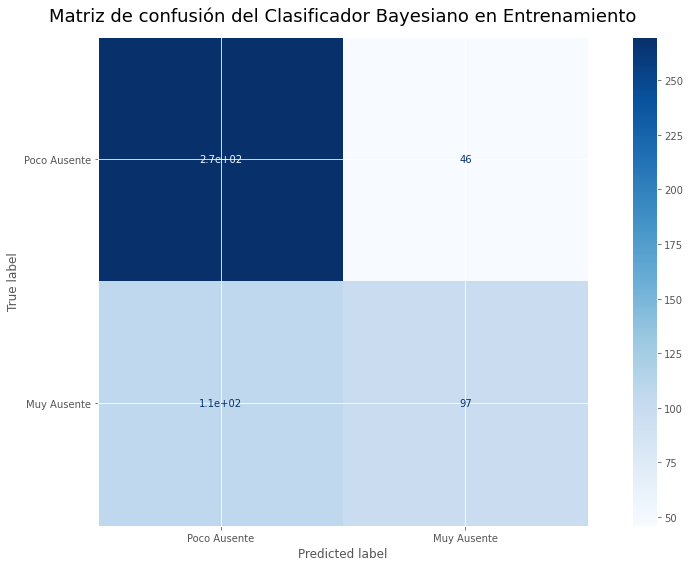

In [ ]:
disp = plot_confusion_matrix(gnb, x_train, y_train,
                                 display_labels=['Poco Ausente', 'Muy Ausente'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Clasificador Bayesiano en Entrenamiento', y=1.02, size=18)

plt.show()

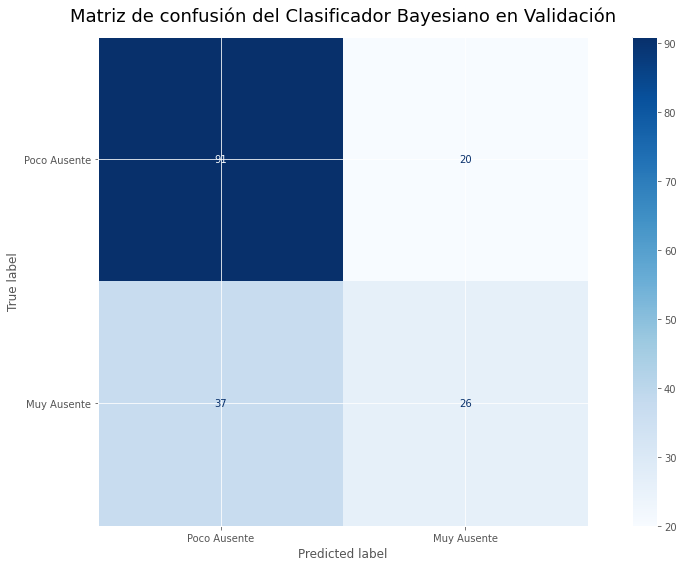

In [ ]:
disp = plot_confusion_matrix(gnb, x_test, y_test,
                                 display_labels=['Poco Ausente', 'Muy Ausente'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Clasificador Bayesiano en Validación', y=1.02, size=18)

plt.show()

# Árbol De Decisión y GNB con SelectKBest

Se aplica el método de mejor selección a los datos

In [ ]:
X=data.drop(['Absenteeism time in hours'], axis=1)
y=data['Absenteeism time in hours']

best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
selected = best.get_support(indices=True)
print(X.columns[selected])
X_new.shape

Index(['ID', 'Reason for absence', 'Transportation expense',
       'Disciplinary failure', 'Son'],
      dtype='object')


(693, 5)

Según lo anterior, las 5 características más representativas son: ID, Reason for absence, Transportation expense, Disciplinary failure y Son

In [ ]:
data=data[['ID', 'Reason for absence', 'Transportation expense',
       'Disciplinary failure', 'Son','Absenteeism time in hours']]
data

,ID,Reason for absence,Transportation expense,Disciplinary failure,Son,Absenteeism time in hours
0,11,26,289,0,2,0
1,36,0,118,1,1,0
2,3,23,179,0,0,0
3,7,7,279,0,2,0
4,11,23,289,0,2,0
...,...,...,...,...,...,...
688,10,22,361,0,1,1
689,28,22,225,0,1,1
690,13,13,369,0,3,1
691,11,14,289,0,2,1


#Árbol de decisión

Igualmente se usará Cross Validation para saber la profundidad del árbol que maximice los resultados

In [ ]:
cv = KFold(n_splits=15,random_state=1, shuffle=True) # n_splits=Numero deseado de "folds" que haremos (5 como default)
accuracies = list()

# Testearemos el min samples leaf
for m in minhojas:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             #min_samples_split=20,
                                             min_samples_leaf=m,
                                             #max_depth = depth,
                                             class_weight={0:1, 1:427/266}#Pesos para balancear
                                             ) # Por defecto todas las clases igual peso

    for train_fold, valid_fold in cv.split(data):
        f_train = data.loc[train_fold]
        f_valid = data.loc[valid_fold]

        model = tree_model.fit(X = f_train.drop(['Absenteeism time in hours'], axis=1),
                               y = f_train["Absenteeism time in hours"])
        valid_acc = model.score(X = f_valid.drop(['Absenteeism time in hours'], axis=1),
                                y = f_valid["Absenteeism time in hours"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)

# Mostramos los resultados obtenidos
df = pd.DataFrame({"min_samples_leaf": minhojas, "Average Accuracy": accuracies})
df = df[["min_samples_leaf", "Average Accuracy"]]
print(df.to_string(index=False))

 min_samples_leaf  Average Accuracy
                1          0.819457
                6          0.819550
               11          0.802220
               16          0.823867
               21          0.842615
               26          0.835368
               31          0.823867
               36          0.803577
               41          0.789146
               46          0.787727
               51          0.787727
               56          0.783380
               61          0.751650
               66          0.753006
               71          0.747209
               76          0.747209
               81          0.750108
               86          0.750108
               91          0.750108
               96          0.750108
              101          0.750108
              106          0.750108
              111          0.750108
              116          0.750108
              121          0.750108
              126          0.750108
              131          0

Se crea el árbol de decisión con las 5 características seleccionadas con min_samples_leaf=21 con criterio de entropia, ya que volvió a ser el mejor modelo.

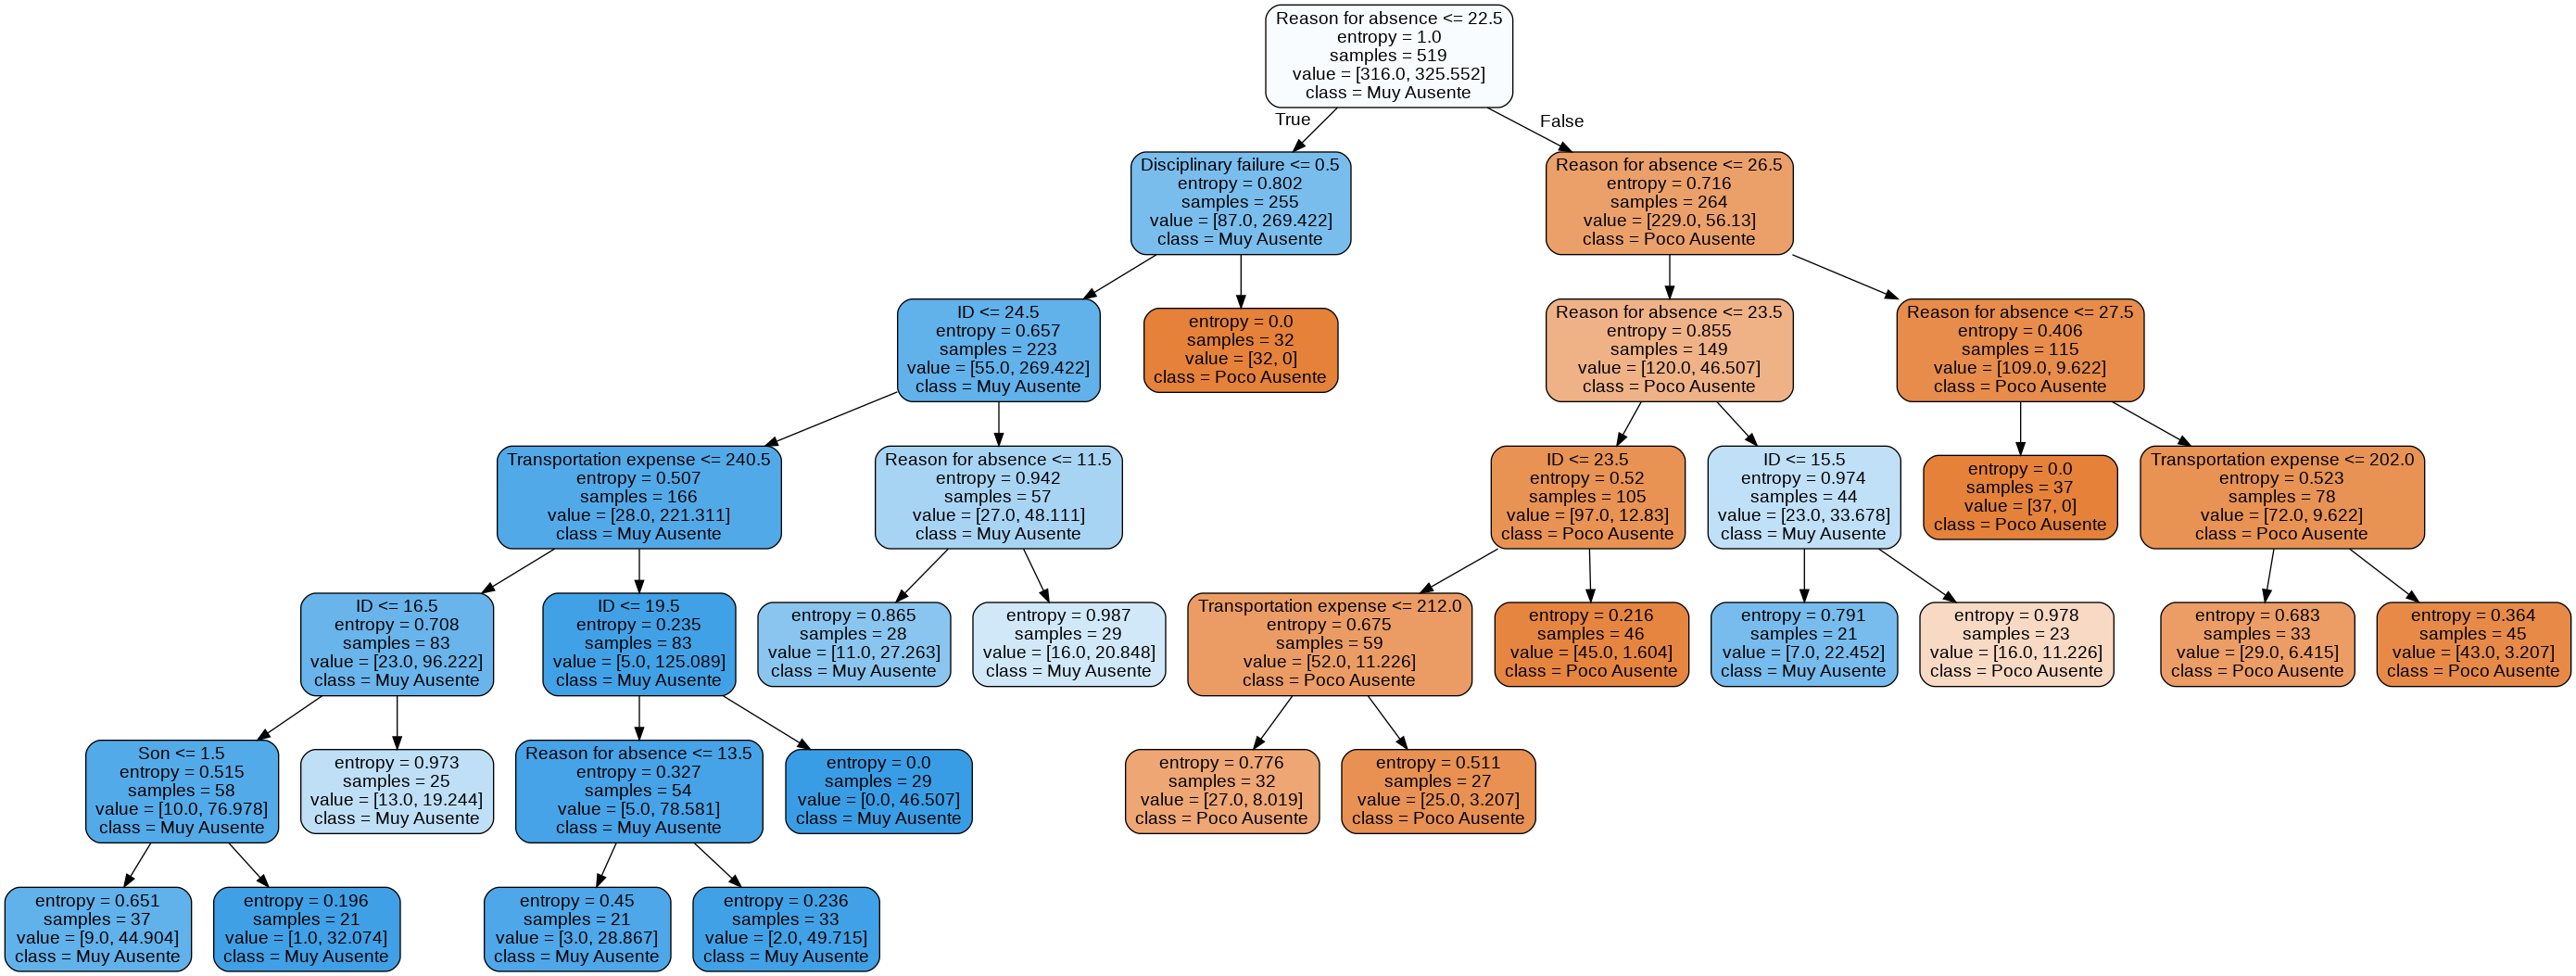

In [ ]:
# Crear arrays de entrenamiento con el nuevo dataset de 5 características
x_train, x_test, y_train, y_test = train_test_split(data.drop(['Absenteeism time in hours'], axis=1).values, data['Absenteeism time in hours'], random_state=0)
# Crear Arbol de decision con profundidad = 5
decision_treeSKB = tree.DecisionTreeClassifier(criterion='entropy',
                                            #min_samples_split=20,
                                            min_samples_leaf=21,
                                            #max_depth = 3,
                                            class_weight={0:1, 1:433/270}
                                            )

decision_treeSKB.fit(x_train, y_train)

# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_treeSKB,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(data.drop(['Absenteeism time in hours'], axis=1)),
                              class_names = ['Poco Ausente', 'Muy Ausente'],
                              rounded = True,
                              filled= True )

# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

#Precisión del Árbol

Entrenamiento

In [ ]:
acc_decision_tree = round(decision_treeSKB.score(x_train, y_train) * 100, 2)
print(acc_decision_tree,'%')

84.01 %


Validación

In [ ]:
acc_decision_tree = round(decision_treeSKB.score(x_test, y_test) * 100, 2)
print(acc_decision_tree,'%')

76.44 %


En el primer modelo de árbol se obtuvo una precisión de entrenamiento de 86.71 % y en validación de 81.03%. Lo que indica un leve degrade de 1.55% en el entrenamiento y en validación de 2.87%.

#Predicción del Árbol

In [ ]:
newdatapred=datapred[['ID', 'Reason for absence', 'Transportation expense',
       'Disciplinary failure', 'Son','Absenteeism time in hours']]

In [ ]:
y_pred = decision_treeSKB.predict(newdatapred.drop(['Absenteeism time in hours'], axis = 1))
print("Prediccion: " + str(y_pred))
y_proba = decision_treeSKB.predict_proba(newdatapred.drop(['Absenteeism time in hours'], axis = 1))
print("Probabilidad de Acierto: " + str(np.round(y_proba[0][y_pred]* 100, 2)) + "%")


Prediccion: [0 0 0 1 1 0 1 1 1 0]
Probabilidad de Acierto: [81.89 81.89 81.89 18.11 18.11 81.89 18.11 18.11 18.11 81.89]%


# Matriz de Confusión del Árbol de Desición con SelectK Best

En entrenamiento

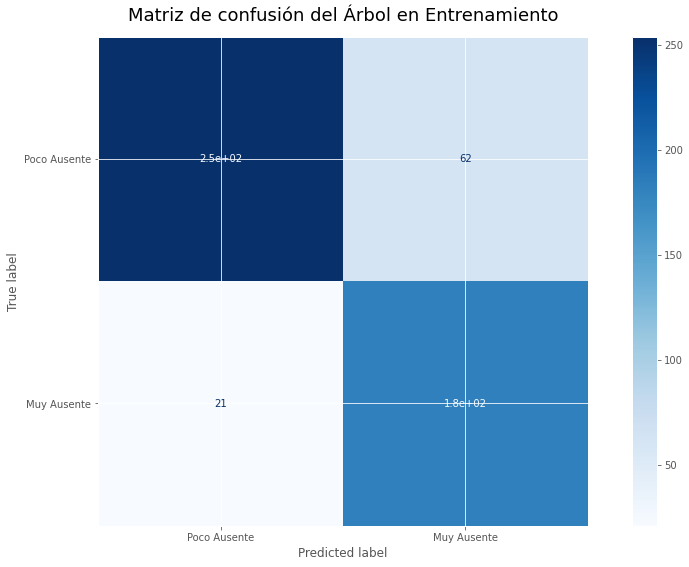

In [ ]:
disp = plot_confusion_matrix(decision_treeSKB, x_train, y_train,
                                 display_labels=['Poco Ausente', 'Muy Ausente'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol en Entrenamiento', y=1.02, size=18)

plt.show()

En validación

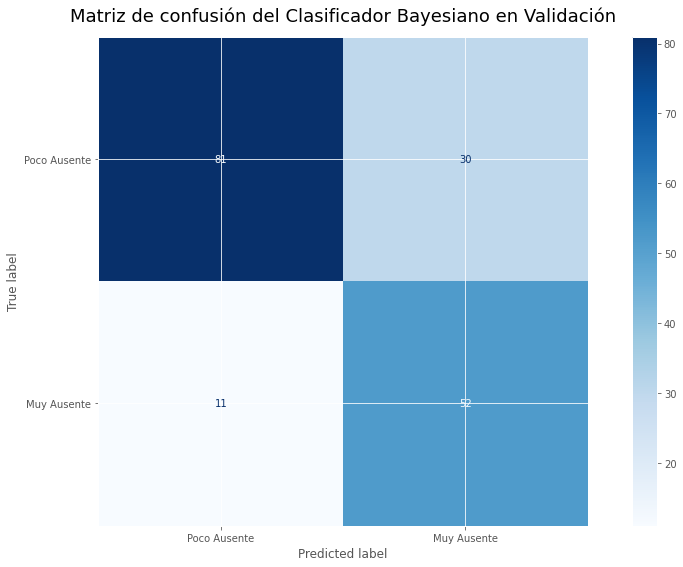

In [ ]:
disp = plot_confusion_matrix(decision_treeSKB, x_test, y_test,
                                 display_labels=['Poco Ausente', 'Muy Ausente'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Clasificador Bayesiano en Validación', y=1.02, size=18)

plt.show()

#GNB

#Entrenamiento y Precisión

In [ ]:
# Instantiate the classifier
gnbSKB = GaussianNB()
# Train classifier
gnbSKB.fit(x_train, y_train)
y_pred = gnbSKB.predict(x_test)

print('Accuracy in training set: {:.2f}'
     .format(gnbSKB.score(x_train, y_train)))
print('Accuracy in test set: {:.2f}'
     .format(gnbSKB.score(x_test, y_test)))

Accuracy in training set: 0.45
Accuracy in test set: 0.41


#Predicción

In [ ]:
y_pred=gnbSKB.predict(newdatapred.drop(['Absenteeism time in hours'], axis=1))
print("Prediccion: " + str(y_pred))
y_proba = gnbSKB.predict_proba(newdatapred.drop(['Absenteeism time in hours'], axis = 1))
print("Probabilidad de Acierto: " + str(np.round(y_proba[0][y_pred]* 100, 2)) + "%")

Prediccion: [1 1 1 1 1 1 1 1 1 1]
Probabilidad de Acierto: [96.58 96.58 96.58 96.58 96.58 96.58 96.58 96.58 96.58 96.58]%


# Matriz de Confusión GNB SelectKBest

En entrenamiento

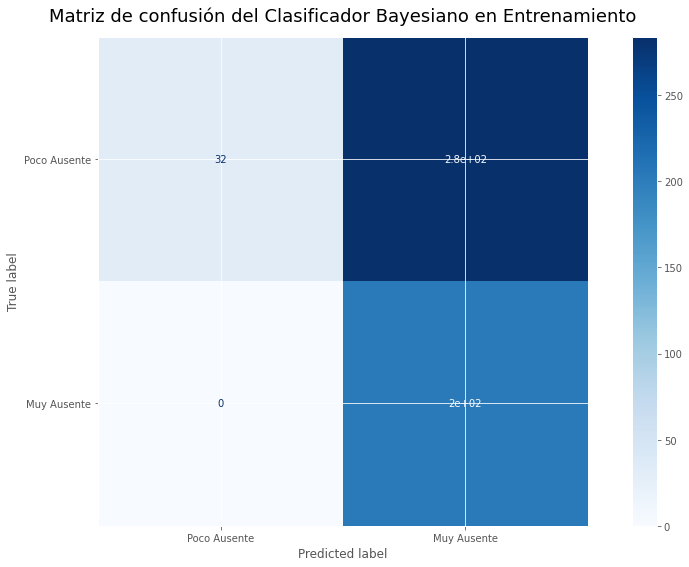

In [ ]:
disp = plot_confusion_matrix(gnbSKB, x_train, y_train,
                                 display_labels=['Poco Ausente', 'Muy Ausente'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Clasificador Bayesiano en Entrenamiento', y=1.02, size=18)

plt.show()

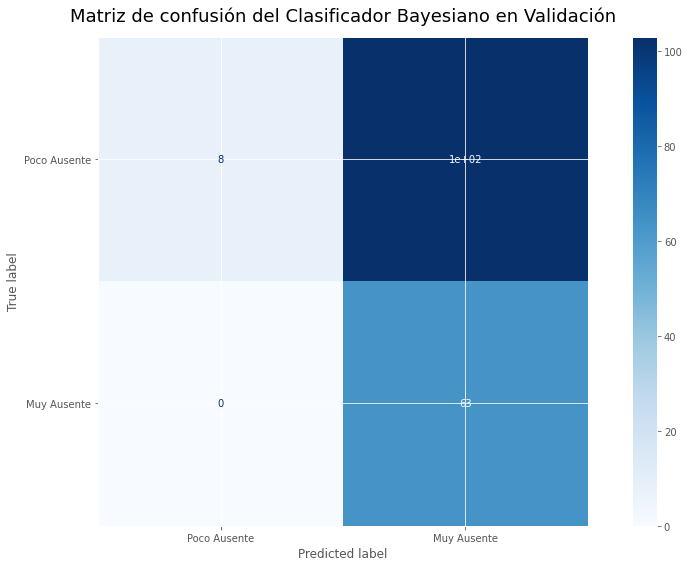

In [ ]:
disp = plot_confusion_matrix(gnbSKB, x_test, y_test,
                                 display_labels=['Poco Ausente', 'Muy Ausente'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Clasificador Bayesiano en Validación', y=1.02, size=18)

plt.show()

# CONCLUSIONES



*   Se hizo necesario realizar preprocesamiento a los datos debido a la presencia de entradas incorrectas y de características con una alta correlación (IBM y el weight)

*   Según el índice de entropia, la característica que representa la raíz del árbol es Reason for absence (entropy=1) ya sea usando la totalidad de las características o las 5 mejores según SelectKBest

* La precisión del árbol fue máxima con 21 muestras mínimas por hoja usando todas las características.

* Se usaron 75% (519) de los datos para entrenamiento y 25% (174) para validación y 10 para predicción.

* Según SelectK Best las 5 cacterísticas más importantes son ID, Reason for absence, Transportation expense, Disciplinary failure y Son, mientras que para el árbol, las características más importantes sonReason for absence, Disciplinary failure, Social drinker, Weight, Month of Absence, pet, Work Load Average, Transportatin expense y Day of the week. Pero ésta diferencia no presenta un problema ya que son algoritmos diferentes.

* Se determinó que el mejor modelo, a pesar de que su exactitud de ajuste fue bajo, es GNB aplicando SKB debido a su alta capacidad de predicción.

* Se determinó que según el árbol de decisión si reason for abscence es menor o igual a 22.5, es decir, cualquier motivo de enfermedad, tendrá una ausentismo alto.